In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

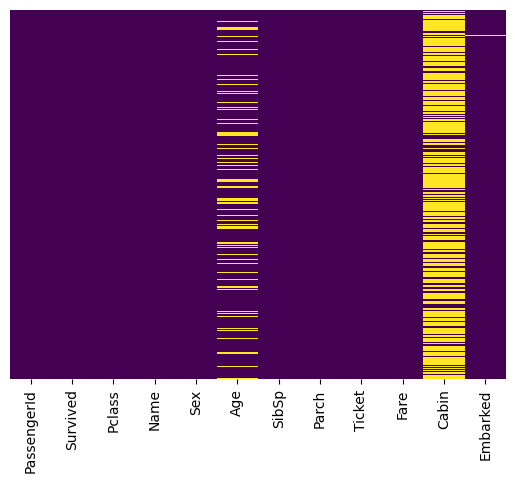

In [3]:
#for null values in dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
sns.set_style('whitegrid')

In [5]:
#Data analysis


<AxesSubplot: xlabel='Survived', ylabel='count'>

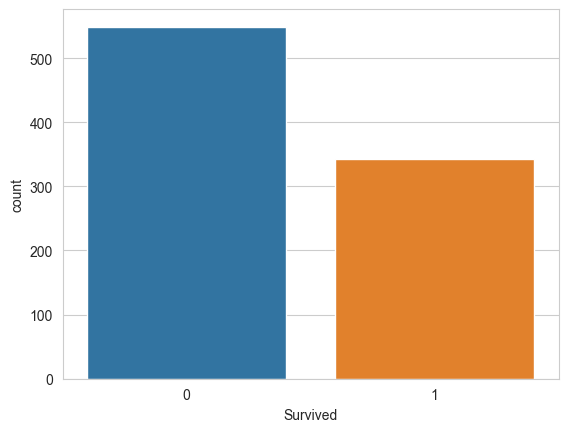

In [6]:
#who survived or not survived
sns.countplot(x='Survived',data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

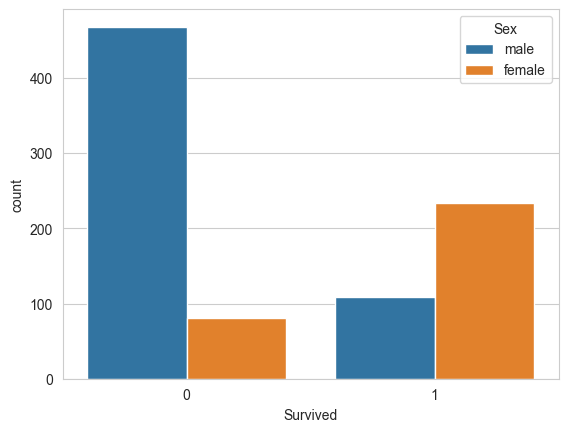

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

#More male died and more female survived(according to dataset)

<AxesSubplot: xlabel='Survived', ylabel='count'>

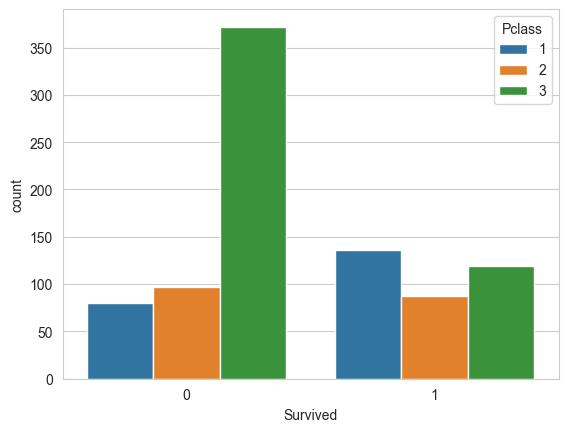

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)

#People with lowest class survived less as compared to people of 1st class and 2nd class

C:\Users\S.D HAIDER\AppData\Local\Temp\ipykernel_31224\221922443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<AxesSubplot: xlabel='Age'>

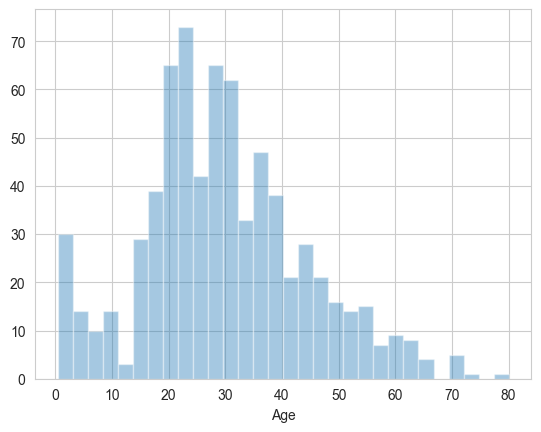

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

#Age distribution of passengers on board

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='SibSp', ylabel='count'>

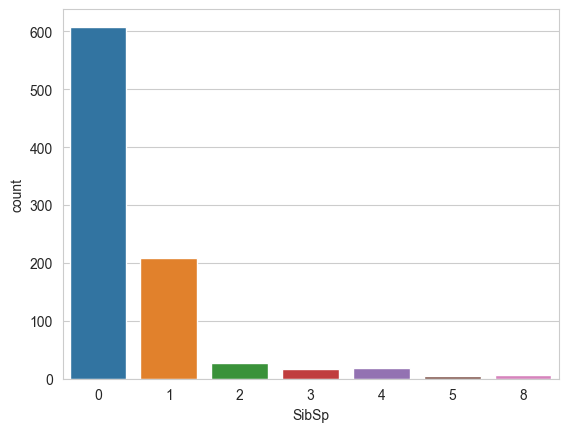

In [11]:
sns.countplot(x='SibSp',data=train)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

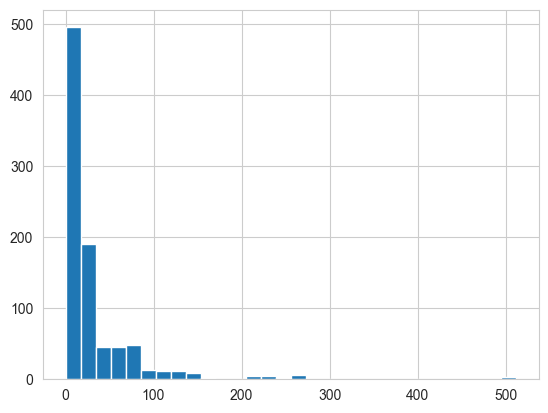

In [12]:
plt.hist(x='Fare',data=train,bins=30)

#Through the distribution we can see large number of passengers have purchased cheap or 3rd class ticket and that is why more deaths are recorded from 3rd class

In [13]:
#(For interactive plotting)
#import cufflinks as cf

In [14]:
#cf.go_offline()

In [15]:
#train['Fare'].iplot(kind='hist',bins=30)

In [16]:
#imputation
sns.boxplot(x='Pclass',y='Age',data=train)
def impute_age(cols):
   Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else
     return Age

IndentationError: unexpected indent (523515146.py, line 5)

In [17]:
#def impute_age(cols):
   #Age=cols[0]
   #Pclass=cols[1]
    
    #if pd.isnull(Age):
        #if Pclass==1:
            #return 37
        #elif Pclass==2:
            #return 29
        #else:
            #return 24
    #else:
        #return Age

In [18]:
#train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [19]:
#imputing the null values of 'Age' column with mean or average age
train['Age']=train['Age'].fillna(train['Age'].mean())

In [20]:
#dropping null values from cabin
train.drop('Cabin',axis=1,inplace=True)


<AxesSubplot: >

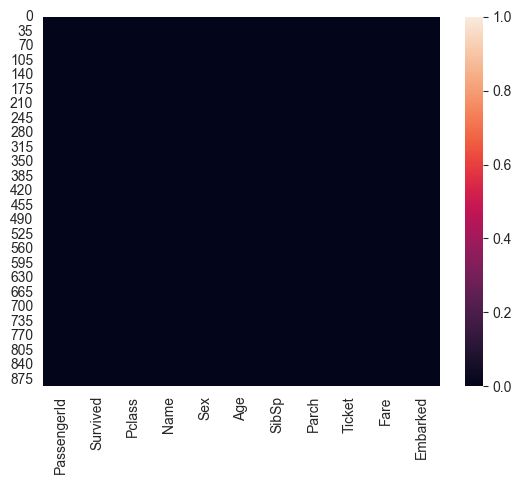

In [21]:
sns.heatmap(train.isnull())

In [22]:
#One hot Encoding
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
train=pd.concat([train,sex,embark],axis=1)


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LogModel= LogisticRegression()

In [35]:
LogModel.fit(X_train,y_train)

C:\Users\S.D HAIDER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = LogModel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       395
           1       0.73      0.71      0.72       228

    accuracy                           0.80       623
   macro avg       0.78      0.78      0.78       623
weighted avg       0.79      0.80      0.80       623



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[335,  60],
       [ 67, 161]], dtype=int64)